In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
df=pd.read_csv("OneRepublic - Counting Stars.csv", on_bad_lines='skip', encoding='utf-8', engine='python')

In [45]:
df

,row_number,original_comment,translated_comment
0,2,I love this song so much that I play it everyday😊,I love this song so much that I play it everyd...
1,3,I remember when this song was 5 years old 😅,I remember when this song was 5 years old 😅
2,9,2024 nghe vẫn hay 🔥❤️‍🔥,2024 still sounds good 🔥🔥
3,10,🎉,🎉
4,11,The best song ever!,None
...,...,...,...
12392,Who still counting stars..?⭐️,8 years later,None
12393,Who still counting stars,None,None
12394,49740,2021 ? 👍,2021 ? 👍
12395,49742,I remember this music was said to be a illumin...,I remember this music was said to be a illumin...


In [46]:
mapping=pd.read_csv("Mapping2.csv")

In [47]:
mapping

,Unnamed: 0,emoji,label
0,0,❤,0
1,1,🇧,1
2,2,🇮,2
3,3,🎉,3
4,4,🎧,4
5,5,🎵,5
6,6,🎶,6
7,7,👀,7
8,8,👇,8
9,9,👌,9


In [48]:
import re
def remove_emojis_and_check(comment):
    # Ensure the comment is a string (handle NaN, None, or non-string values)
    if not isinstance(comment, str):
        return None
    
    # Remove any emoji using a general emoji pattern
    # This regex matches all emojis
    emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F'  # Emoticons
                               r'\U0001F300-\U0001F5FF'  # Symbols & Pictographs
                               r'\U0001F680-\U0001F6FF'  # Transport & Map Symbols
                               r'\U0001F700-\U0001F77F'  # Alchemical Symbols
                               r'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
                               r'\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
                               r'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
                               r'\U0001FA00-\U0001FA6F'  # Chess Symbols
                               r'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
                               r'\U00002702-\U000027B0'  # Miscellaneous Symbols
                               r'\U000024C2-\U0001F251'  # Enclosed characters
                               r']', flags=re.UNICODE)

    # Remove emojis from the comment
    cleaned_comment = re.sub(emoji_pattern, '', comment)

    # If the cleaned comment is empty or just spaces, return None to drop the row
    if not cleaned_comment.strip():
        return None
    
    return cleaned_comment

In [49]:
df['translated_comment'] = df['translated_comment'].apply(remove_emojis_and_check)

In [50]:
df

,row_number,original_comment,translated_comment
0,2,I love this song so much that I play it everyday😊,I love this song so much that I play it everyday
1,3,I remember when this song was 5 years old 😅,I remember when this song was 5 years old
2,9,2024 nghe vẫn hay 🔥❤️‍🔥,2024 still sounds good
3,10,🎉,None
4,11,The best song ever!,None
...,...,...,...
12392,Who still counting stars..?⭐️,8 years later,None
12393,Who still counting stars,None,None
12394,49740,2021 ? 👍,2021 ?
12395,49742,I remember this music was said to be a illumin...,I remember this music was said to be a illumin...


In [51]:
df = df.dropna(subset=['translated_comment'])
df

,row_number,original_comment,translated_comment
0,2,I love this song so much that I play it everyday😊,I love this song so much that I play it everyday
1,3,I remember when this song was 5 years old 😅,I remember when this song was 5 years old
2,9,2024 nghe vẫn hay 🔥❤️‍🔥,2024 still sounds good
9,12,11 years later and this song is still a legend❤,11 years later and this song is still a legend
10,16,2024❤,2024
...,...,...,...
12388,49725,This song represents Hope of the People who ar...,This song represents Hope of the People who ar...
12390,49733,Who are coming here daily for checking the vie...,Who are coming here daily for checking the vie...
12394,49740,2021 ? 👍,2021 ?
12395,49742,I remember this music was said to be a illumin...,I remember this music was said to be a illumin...


In [52]:
import string
def tweet_clean(tweet):
    tweet = str(tweet).lower()
    # remove @mentions
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet) 
    
    # remove RT
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention) 
    
    # remove hyperlinks
    rm_links = re.sub(r'http\S+', '', rm_rt)                               
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    
    # remove numbers
    rm_nums = re.sub('[0-9]+', '', rm_links)         
    
    # remove punctuations
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned

In [53]:
df["translated_comment"] = df["translated_comment"].apply(tweet_clean)
df

,row_number,original_comment,translated_comment
0,2,I love this song so much that I play it everyday😊,i love this song so much that i play it everyday
1,3,I remember when this song was 5 years old 😅,i remember when this song was years old
2,9,2024 nghe vẫn hay 🔥❤️‍🔥,still sounds good
9,12,11 years later and this song is still a legend❤,years later and this song is still a legend
10,16,2024❤,
...,...,...,...
12388,49725,This song represents Hope of the People who ar...,this song represents hope of the people who ar...
12390,49733,Who are coming here daily for checking the vie...,who are coming here daily for checking the vie...
12394,49740,2021 ? 👍,
12395,49742,I remember this music was said to be a illumin...,i remember this music was said to be a illumin...


In [54]:
df = df.dropna(subset=['translated_comment'])
df

,row_number,original_comment,translated_comment
0,2,I love this song so much that I play it everyday😊,i love this song so much that i play it everyday
1,3,I remember when this song was 5 years old 😅,i remember when this song was years old
2,9,2024 nghe vẫn hay 🔥❤️‍🔥,still sounds good
9,12,11 years later and this song is still a legend❤,years later and this song is still a legend
10,16,2024❤,
...,...,...,...
12388,49725,This song represents Hope of the People who ar...,this song represents hope of the people who ar...
12390,49733,Who are coming here daily for checking the vie...,who are coming here daily for checking the vie...
12394,49740,2021 ? 👍,
12395,49742,I remember this music was said to be a illumin...,i remember this music was said to be a illumin...


In [55]:
df=df[df['translated_comment']!='']
df

,row_number,original_comment,translated_comment
0,2,I love this song so much that I play it everyday😊,i love this song so much that i play it everyday
1,3,I remember when this song was 5 years old 😅,i remember when this song was years old
2,9,2024 nghe vẫn hay 🔥❤️‍🔥,still sounds good
9,12,11 years later and this song is still a legend❤,years later and this song is still a legend
11,17,O.M.G🎉🎉🎉🎉🎉🎉🎉❤❤,omg
...,...,...,...
12388,49725,This song represents Hope of the People who ar...,this song represents hope of the people who ar...
12390,49733,Who are coming here daily for checking the vie...,who are coming here daily for checking the vie...
12394,49740,2021 ? 👍,
12395,49742,I remember this music was said to be a illumin...,i remember this music was said to be a illumin...


In [56]:
df=df[df['translated_comment']!=' ']
df

,row_number,original_comment,translated_comment
0,2,I love this song so much that I play it everyday😊,i love this song so much that i play it everyday
1,3,I remember when this song was 5 years old 😅,i remember when this song was years old
2,9,2024 nghe vẫn hay 🔥❤️‍🔥,still sounds good
9,12,11 years later and this song is still a legend❤,years later and this song is still a legend
11,17,O.M.G🎉🎉🎉🎉🎉🎉🎉❤❤,omg
...,...,...,...
12388,49725,This song represents Hope of the People who ar...,this song represents hope of the people who ar...
12390,49733,Who are coming here daily for checking the vie...,who are coming here daily for checking the vie...
12394,49740,2021 ? 👍,
12395,49742,I remember this music was said to be a illumin...,i remember this music was said to be a illumin...


In [57]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords(tweet):
    # Tokenize the tweet into words
    words = word_tokenize(tweet)

    # Get the English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tweet
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    filtered_tweet = ' '.join(filtered_words)

    return filtered_tweet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
df["translated_comment"] = df["translated_comment"].apply(remove_stopwords)
df

,row_number,original_comment,translated_comment
0,2,I love this song so much that I play it everyday😊,love song much play everyday
1,3,I remember when this song was 5 years old 😅,remember song years old
2,9,2024 nghe vẫn hay 🔥❤️‍🔥,still sounds good
9,12,11 years later and this song is still a legend❤,years later song still legend
11,17,O.M.G🎉🎉🎉🎉🎉🎉🎉❤❤,omg
...,...,...,...
12388,49725,This song represents Hope of the People who ar...,song represents hope people danger
12390,49733,Who are coming here daily for checking the vie...,coming daily checking views song
12394,49740,2021 ? 👍,
12395,49742,I remember this music was said to be a illumin...,remember music said illuminati


In [59]:
X = df["translated_comment"].values

In [60]:
X = X.reshape(-1,)
X.shape

(8154,)

In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(X)

In [62]:
print("Text \n",X[:10],'\n')

X_seqs = tokenizer.texts_to_sequences(X)
print("Sequences")
X_seqs[:10]

Text 
 ['love song much play everyday' 'remember song years old'
 'still sounds good' 'years later song still legend' 'omg'
 'popular song still popular' 'insomniacs october'
 'year old sons favorite song' 'whi thinks oldest best songg' 'yeah'] 

Sequences


[[3, 1, 33, 220, 177],
 [39, 1, 4, 6],
 [2, 301, 8],
 [4, 99, 1, 2, 71],
 [135],
 [257, 1, 2, 257],
 [1453, 201],
 [43, 6, 1454, 31, 1],
 [1455, 569, 778, 13, 779],
 [202]]

In [63]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(100,110):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  100 ----> may
Index:  101 ----> hard
Index:  102 ----> new
Index:  103 ----> th
Index:  104 ----> pearl
Index:  105 ----> today
Index:  106 ----> believe
Index:  107 ----> star
Index:  108 ----> likes
Index:  109 ----> awesome


In [64]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 3868


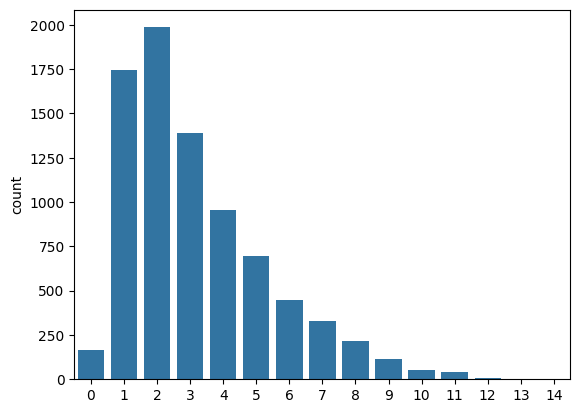

In [65]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [66]:
from tensorflow.keras.utils import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [67]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[3, 1, 33, 220, 177]]

After Padding
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3
    1  33 220 177]]


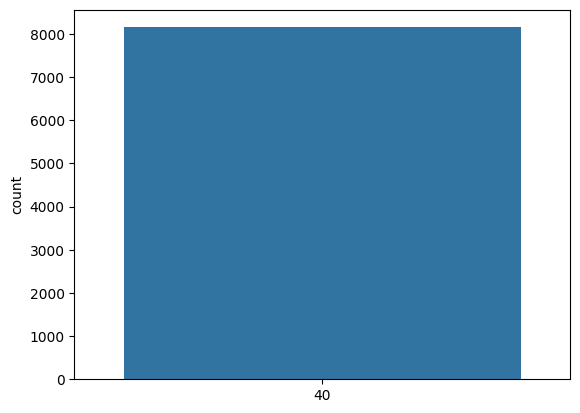

In [68]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

In [69]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [70]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = 21613  # Match the saved model's vocabulary size
seq_len = 40
embed_len = 128

# Rebuild the model architecture
model = Sequential()
model.add(Embedding(vocabulary_size, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation="softmax"))

# Build the model
model.build(input_shape=(None, seq_len))  # None for batch size

# Load weights
model.load_weights('BTP_eval.weights.h5')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 40, 128)             │       2,766,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 40, 200)             │         183,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 40, 200)             │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 200)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          25,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,221,352 (12.29 MB)

 Trainable params: 3,221,352 (12.29 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
def sequences_to_text(sequences, tokenizer):
    return [' '.join([tokenizer.index_word.get(i, '') for i in seq if i != 0]) for seq in sequences]

# Assuming 'model' is your trained model and 'y_pred' contains the predicted class indices
# 1. Rebuild the original comments from tokenized sequences
reconstructed_comments = sequences_to_text(X_seqs_pd, tokenizer)

# 2. Get the predicted labels (e.g., if model output is class indices)
y_pred = model.predict(X_seqs_pd)
y_pred_class = np.argmax(y_pred, axis=1)  # Use this if model output is probabilities

# 3. Create a DataFrame
result_df = pd.DataFrame({
    'translated_comment': reconstructed_comments,
    'predicted_label': y_pred_class
})

255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [72]:
result_df

,translated_comment,predicted_label
0,love song much play everyday,31
1,remember song years old,4
2,still sounds good,30
3,years later song still legend,1
4,omg,37
...,...,...
8149,song represents hope people danger,26
8150,coming daily checking views song,24
8151,,0
8152,remember music said illuminati,23


In [73]:
number_to_emoji = dict(zip(mapping['label'], mapping['emoji']))

# Assuming 'result_df' is your DataFrame with 'actual_label' and 'predicted_label' columns containing label numbers
result_df['predicted_label_emoji'] = result_df['predicted_label'].map(number_to_emoji)

# Display the updated DataFrame
compare_df=result_df[['translated_comment', 'predicted_label_emoji']]
compare_df

,translated_comment,predicted_label_emoji
0,love song much play everyday,😭
1,remember song years old,🎧
2,still sounds good,😢
3,years later song still legend,🇧
4,omg,🤣
...,...,...
8149,song represents hope people danger,😍
8150,coming daily checking views song,😊
8151,,❤
8152,remember music said illuminati,😅


In [74]:
import numpy as np
from textblob import TextBlob

# Step 1: Assign sentiment values to emojis
emoji_sentiment = {
    "❤": 90, "🇧": 50, "🇮": 50, "🎉": 85, "🎧": 70, "🎵": 75,
    "🎶": 75, "👀": 50, "👇": 30, "👌": 80, "👍": 85, "👏": 88,
    "💀": 20, "💔": 10, "💕": 95, "💖": 95, "💯": 100, "🔥": 80,
    "🕊": 90, "🗿": 40, "😀": 95, "😁": 90, "😂": 85, "😅": 75,
    "😊": 80, "😌": 70, "😍": 95, "😎": 80, "😔": 40, "😘": 85,
    "😢": 30, "😭": 20, "😮": 50, "😳": 45, "🙂": 75, "🙏": 85,
    "🚩": 30, "🤣": 80, "🥰": 90, "🥺": 40
}

In [75]:
def text_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    scaled_sentiment = (polarity + 1) * 50  
    return scaled_sentiment

In [76]:
def calculate_rms(text_sentiment, emoji_sentiment):
    return np.sqrt((text_sentiment ** 2 + emoji_sentiment ** 2) / 2)

In [77]:
def process_row(row):
    text_sent_val = text_sentiment(row['translated_comment'])  # Get sentiment for text
    emoji_sent_val = emoji_sentiment.get(row['predicted_label_emoji'], None)  # Get sentiment for emoji
    if emoji_sent_val is not None:
        rms_value = calculate_rms(text_sent_val, emoji_sent_val)  # Calculate RMS
        return text_sent_val, emoji_sent_val, rms_value
    else:
        return text_sent_val, 0, 0  

In [78]:
compare_df[['text_sentiment', 'emoji_sentiment', 'rms']] = compare_df.apply(process_row, axis=1, result_type='expand')
compare_df

,translated_comment,predicted_label_emoji,text_sentiment,emoji_sentiment,rms
0,love song much play everyday,😭,58.333333,20.0,43.604918
1,remember song years old,🎧,55.000000,70.0,62.948392
2,still sounds good,😢,85.000000,30.0,63.737744
3,years later song still legend,🇧,50.000000,50.0,50.000000
4,omg,🤣,50.000000,80.0,66.708320
...,...,...,...,...,...
8149,song represents hope people danger,😍,50.000000,95.0,75.911132
8150,coming daily checking views song,😊,50.000000,80.0,66.708320
8151,,❤,50.000000,90.0,72.801099
8152,remember music said illuminati,😅,50.000000,75.0,63.737744


In [79]:
def calculate_rms_for_dataframe(df):
    squared_differences = []
    for index, row in df.iterrows():
        text_sent_val = text_sentiment(row['translated_comment'])  # Get sentiment for text
        emoji_sent_val = emoji_sentiment.get(row['predicted_label_emoji'], None)  # Get sentiment for emoji
        if emoji_sent_val is not None:
            rms_value = np.sqrt((text_sent_val ** 2 + emoji_sent_val ** 2) / 2)
            squared_differences.append(rms_value)
    
    # Calculate RMS
    rms = np.mean(squared_differences)
    return rms

In [80]:
overall_rms = calculate_rms_for_dataframe(compare_df)
overall_rms

63.61549261969425

In [81]:
rmse_df = pd.DataFrame({'Video Title': ['OneRepublic - Counting Stars'],
                        'RMSE': [overall_rms]})
rmse_df

,Video Title,RMSE
0,OneRepublic - Counting Stars,63.615493


In [82]:
import os

# Check if the CSV file exists
csv_filename = 'sentiment_results.csv'

# If the CSV file exists, append the new RMSE value, otherwise create a new CSV
if os.path.exists(csv_filename):
    # Append the RMSE to the existing CSV
    rmse_df.to_csv(csv_filename, mode='a', header=False, index=False)
else:
    # Create a new CSV file and write the header along with the RMSE
    rmse_df.to_csv(csv_filename, mode='w', header=True, index=False)

print(f"RMSE values have been saved to {csv_filename}")

RMSE values have been saved to sentiment_results.csv
